In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
numeric_data=df.select_dtypes(include=['integer','int64'])
corr_matrix=numeric_data.corr()
corr_matrix

,PassengerId,Survived,Pclass,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000


In [13]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

# Create the heatmap with annotations
fig = go.Figure(data=[go.Heatmap(
    z=corr_matrix.values,          # 2D array of correlation values
    x=corr_matrix.columns,         # Column labels for x-axis (variables)
    y=corr_matrix.columns,         # Row labels for y-axis (variables)
    colorscale='Blues',            # Custom color scale
    colorbar=dict(title="Correlation"),  # Colorbar title
    showscale=True,                # Show the color scale
    text=corr_matrix.values,        # Add correlation values as text
    hoverinfo='text',               # Display text on hover
    texttemplate="%{text:.2f}",     # Format the text to 2 decimal places
)])

# Update layout for better presentation
fig.update_layout(
    title="Correlation Heatmap of Titanic Dataset", 
    xaxis=dict(title='Features'),  # Label for x-axis
    yaxis=dict(title='Features')   # Label for y-axis
)
fig.show()

In [15]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
df_sex=df.groupby('Survived')
df_sex.get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [21]:
df_sex=df.groupby('Survived')
df_sex.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [25]:
import plotly.express as px

In [46]:
df_sex = df['Sex'].value_counts().to_frame().reset_index()
fig=px.pie(df_sex,values='count',names='Sex',title='Sex Value Counts')
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px

df_sex = df.groupby('Survived')['Sex'].value_counts().to_frame().reset_index()
df_sex.columns = ['Survived', 'Sex', 'count']  # Rename columns for clarity

# Create Pie Chart
fig = px.pie(
    df_sex, 
    values='count',               # ✅ Count value for each category
    names='Sex',                  # ✅ Categorical variable (Male/Female)
    color='Sex',                  # ✅ Assigns different colors to categories
    facet_col='Survived',         # ✅ Creates two pie charts (one for survived=0, one for survived=1)
    title="Survival Rate by Sex",  # ✅ Chart title
    labels={'Sex': 'Gender', 'count': 'Count'},
)

# Show percentage & category label on each slice
# fig.update_traces(textinfo='percent+label')

# Show the pie chart
fig.show()


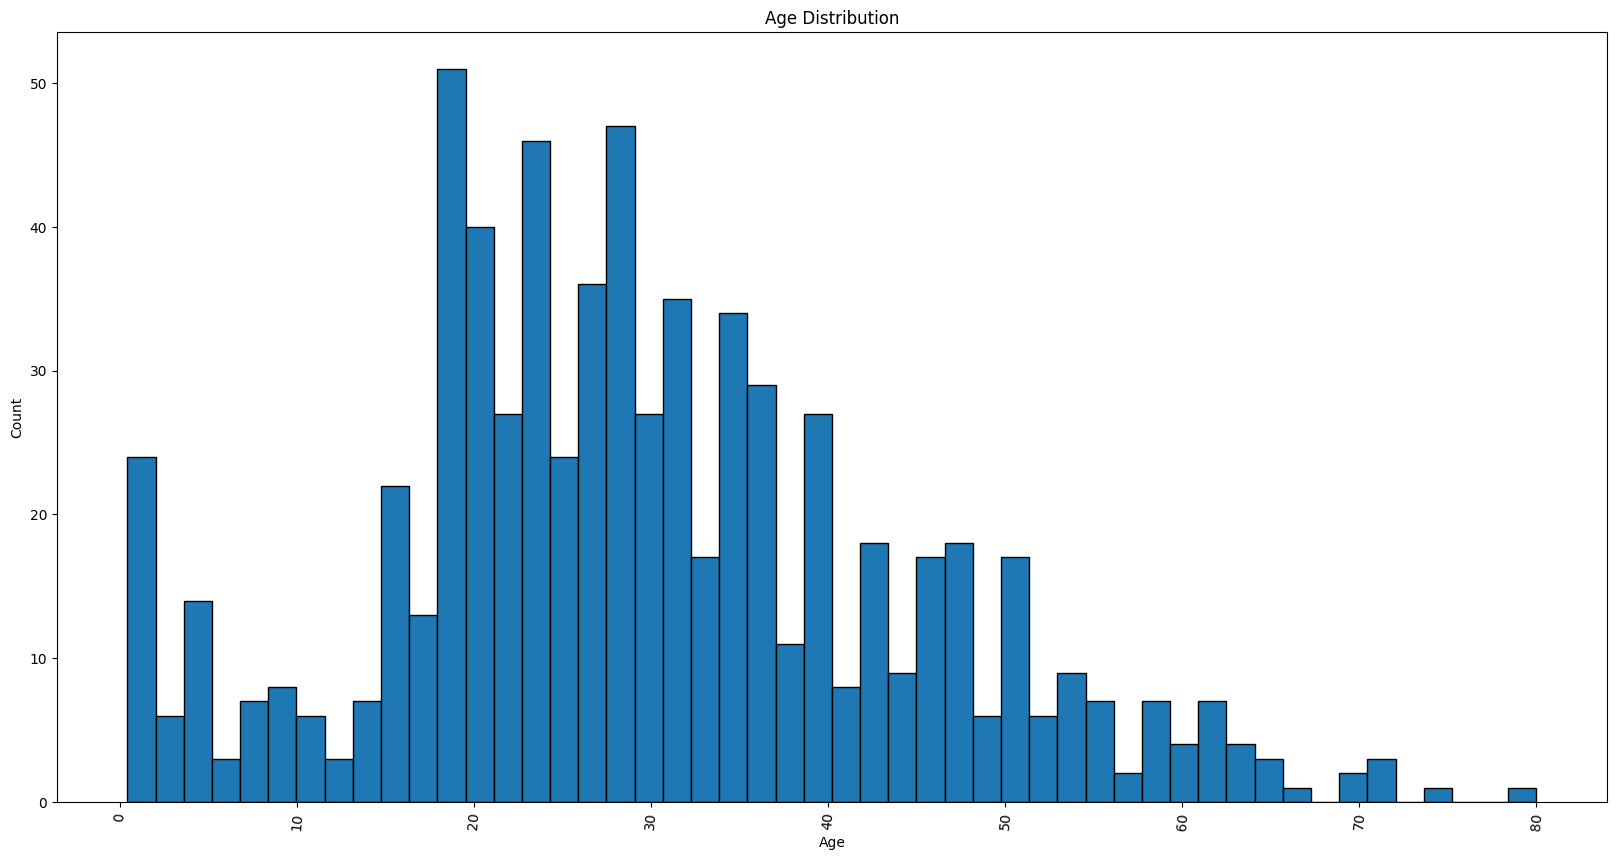

In [42]:
plt.figure(figsize=(20, 10))
plt.hist(df['Age'].dropna(), bins=50, edgecolor='black')
plt.xticks(rotation=85)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()